In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ["CASY", "TSLA", "UBER", "META", "NVDA", "RYCEY"]

data = yf.download(tickers,
                   start = "2024-02-01",
                   end = "2025-02-01",
                   interval = "1d")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed


In [3]:
prices = data["Close"]

In [5]:
simple_returns = prices.pct_change().dropna()
log_returns = np.log(prices / prices.shift(1)).dropna()

In [6]:
print(simple_returns.describe())

Ticker        CASY        META        NVDA       RYCEY        TSLA        UBER
count   250.000000  250.000000  250.000000  250.000000  250.000000  250.000000
mean      0.001892    0.002507    0.003224    0.002882    0.003835    0.000319
std       0.018285    0.023229    0.035867    0.019647    0.040146    0.025176
min      -0.071470   -0.105613   -0.169682   -0.057047   -0.123346   -0.096037
25%      -0.007349   -0.008112   -0.017634   -0.009175   -0.019993   -0.011911
50%      -0.000188    0.001198    0.003049    0.001817    0.001468   -0.001581
75%       0.008803    0.012206    0.025512    0.016673    0.025136    0.012276
max       0.167213    0.203176    0.164009    0.077108    0.219190    0.147268


In [7]:
mean_returns = simple_returns.mean()
vol = simple_returns.std()

In [8]:
correlation_matrix = simple_returns.corr()
covariance_matrix = simple_returns.cov()

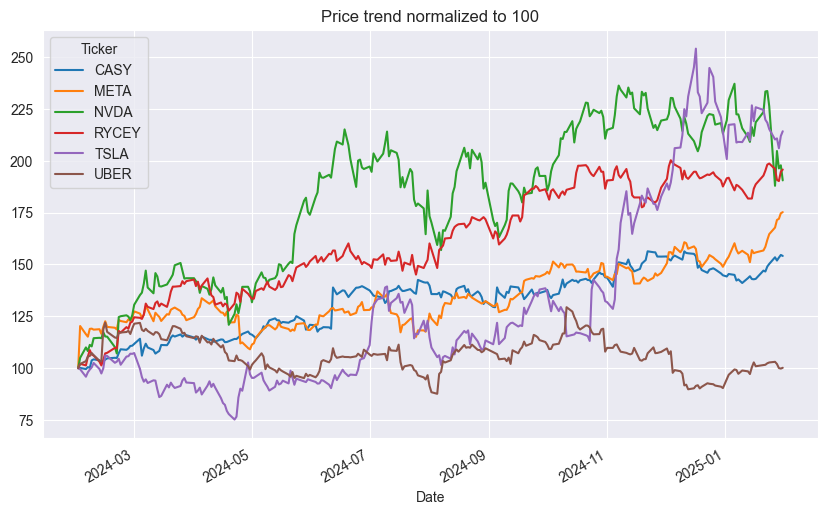

In [9]:
import seaborn as sns

(prices / prices.iloc[0] * 100).plot(figsize=(10,6))
plt.title("Price trend normalized to 100")
plt.show()

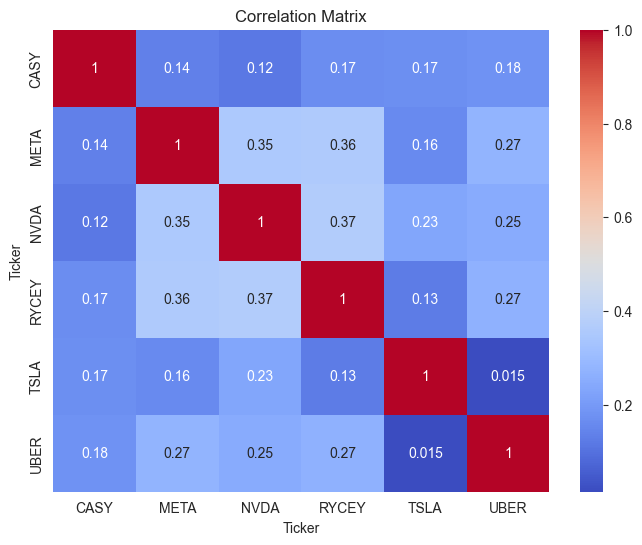

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [11]:
weights = np.array([0.13, 0.18, 0.04, 0.44, 0.13, 0.08])

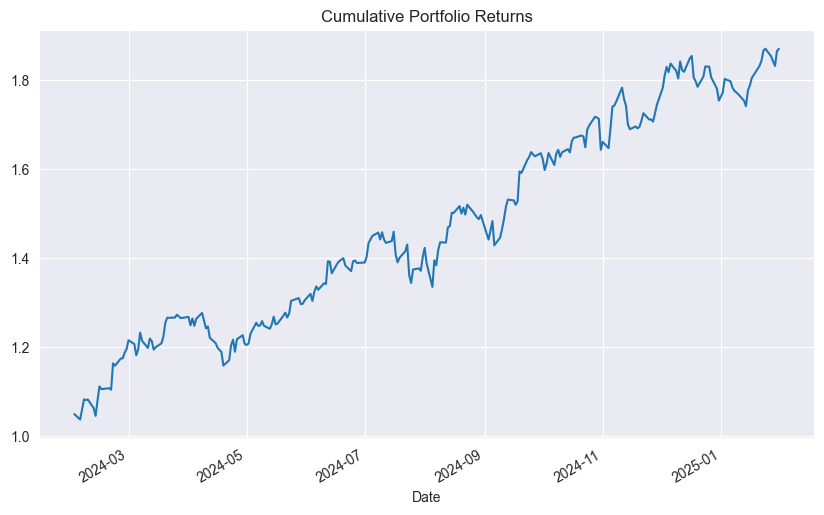

In [12]:
portfolio_returns = (simple_returns * weights).sum(axis=1)
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(10,6))
cumulative_portfolio_returns.plot()
plt.title("Cumulative Portfolio Returns")
plt.show()

# Key Metrics
## Annualized Return = 66%
## Annualized Volatility = 24%
## Sharpe Ratio = 2.6

In [13]:
annualized_return = portfolio_returns.mean() * 252
annualized_vol = portfolio_returns.std() * np.sqrt(252)

print(annualized_return)
print(annualized_vol)

0.6598709449972654
0.23785830610360545


In [14]:
sharpe = (annualized_return - 0.0445)/annualized_vol
print(sharpe)

2.5871324616649054


In [15]:
sp500_data = yf.download("^GSPC",
                        start="2024-02-01",
                        end="2025-02-01",
                        interval="1d")

sp500_prices = sp500_data["Close"]
sp500_returns = sp500_prices.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


In [16]:
sp500_returns.index = sp500_returns.index.tz_localize(None)
portfolio_returns.index = portfolio_returns.index.tz_localize(None)

## Portfolio Beta = 1.43
## Alpha Generated = 37%
* It's important to note that this may not be the true amount of alpha I've generated

In [27]:
sp500_returns = sp500_returns.squeeze()


In [28]:
beta = portfolio_returns.cov(sp500_returns) / sp500_returns.var()
print(beta)

1.4302115962611328


In [29]:
annualized_sp500_return = sp500_returns.mean() * 252
portfolio_annual_return = annualized_return
rf = 0.0445

alpha = (portfolio_annual_return - rf) - beta * (annualized_sp500_return - rf)

print(f"Annual Portfolio Return: {portfolio_annual_return}")
print(f"Alpha: {alpha}")

Annual Portfolio Return: 0.6598709449972654
Alpha: 0.36724230124594304


In [31]:
portfolio_notional = 100000
hedge = beta * portfolio_notional
print(f"Hedge Size: {hedge}")

shares = hedge / 600
print(f"SPY Share Short: {shares}")

Hedge Size: 143021.15962611328
SPY Share Short: 238.36859937685546


# Now let's construct my portfolio as if I've hedged out my market risk

In [32]:
tickers = ["CASY", "TSLA", "UBER", "META", "NVDA", "RYCEY", "SPY"]

data = yf.download(tickers,
                   start = "2024-02-01",
                   end = "2025-02-01",
                   interval = "1d")

[*********************100%***********************]  7 of 7 completed


In [33]:
prices = data["Close"]

In [34]:
simple_returns = prices.pct_change().dropna()
log_returns = np.log(prices / prices.shift(1)).dropna()

In [35]:
print(simple_returns.describe())

Ticker        CASY        META        NVDA       RYCEY         SPY  \
count   250.000000  250.000000  250.000000  250.000000  250.000000   
mean      0.001892    0.002507    0.003224    0.002882    0.000912   
std       0.018285    0.023229    0.035867    0.019647    0.008033   
min      -0.071470   -0.105613   -0.169682   -0.057047   -0.029803   
25%      -0.007349   -0.008112   -0.017634   -0.009175   -0.002909   
50%      -0.000188    0.001198    0.003049    0.001817    0.001111   
75%       0.008803    0.012206    0.025512    0.016673    0.005776   
max       0.167213    0.203176    0.164009    0.077108    0.024866   

Ticker        TSLA        UBER  
count   250.000000  250.000000  
mean      0.003835    0.000319  
std       0.040146    0.025176  
min      -0.123346   -0.096037  
25%      -0.019993   -0.011911  
50%       0.001468   -0.001581  
75%       0.025136    0.012276  
max       0.219190    0.147268  


In [36]:
long_weights = np.array([0.13, 0.18, 0.04, 0.44, 0.13, 0.08]) 
spy_weight = -1 * beta

new_weights = np.append(long_weights, spy_weight) 

total_weight = np.sum(np.abs(new_weights)) 
new_weights = new_weights / total_weight 

# Hedged Portfolio Return: 21%
# Hedged Portfolio Volatility: 22%
# Hedged Portfolio Sharpe: 0.76

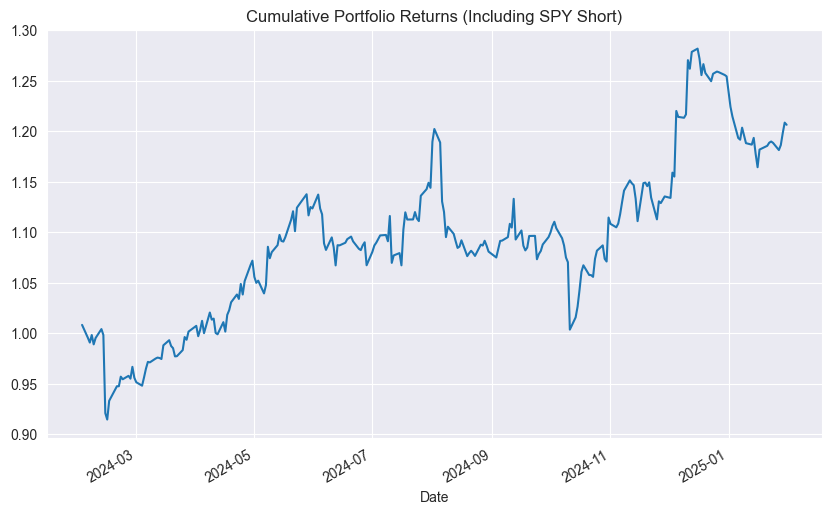

In [37]:
portfolio_returns = (simple_returns * new_weights).sum(axis=1)
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(10,6))
cumulative_portfolio_returns.plot()
plt.title("Cumulative Portfolio Returns (Including SPY Short)")
plt.show()

In [38]:
annualized_return = portfolio_returns.mean() * 252
annualized_vol = portfolio_returns.std() * np.sqrt(252)

print(annualized_return)
print(annualized_vol)

0.21404056619609346
0.2223395711138033


In [39]:
sharpe = (annualized_return - 0.0445)/annualized_vol
print(sharpe)

0.7625298787201269


In [40]:
sp500_returns.index = sp500_returns.index.tz_localize(None)
portfolio_returns.index = portfolio_returns.index.tz_localize(None)

# Hedged Portfolio Beta: -0.12
# Hedged Portfolio Alpha: 19%

In [41]:
beta = portfolio_returns.cov(sp500_returns) / sp500_returns.var()
print(beta)

-0.11927749299595568


In [42]:
annualized_sp500_return = sp500_returns.mean() * 252
portfolio_annual_return = annualized_return
rf = 0.0445

alpha = (portfolio_annual_return - rf) - beta * (annualized_sp500_return - rf)

print(f"Annual Portfolio Return: {portfolio_annual_return}")
print(f"Alpha: {alpha}")

Annual Portfolio Return: 0.21404056619609346
Alpha: 0.19023412136269596
